In [18]:
import numpy as np
from PIL import Image
from os.path import join
from matplotlib import pyplot as plt

In [22]:
folder_path = "../images"
img1 = Image.open(join(folder_path,"image1.jpg")).resize((256, 256))
img2 = Image.open(join(folder_path,"image2.jpg")).resize((256, 256))

In [23]:
arr1 = np.array(img1)
arr2 = np.array(img2)

### **Creating images from the arrays**

In [24]:
blended = ((arr1.astype(np.float32) + arr2.astype(np.float32)) / 2).astype(np.uint8)

#### **1. Average Blend**

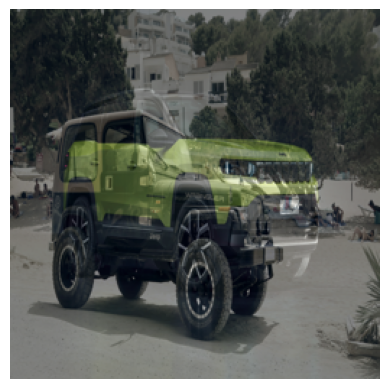

In [25]:
# Show the image
plt.imshow(blended)
plt.axis('off')
plt.show()

#### **2. Weighted Merge**

In [26]:
weighted_blend = (0.5 * arr1 + 0.3 * arr2).astype(np.uint8)

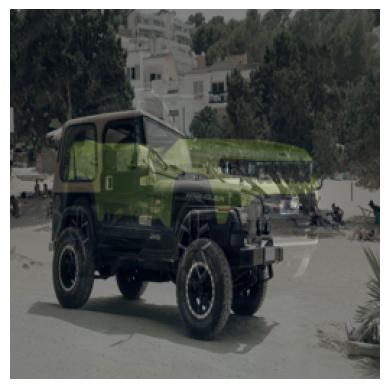

In [27]:
plt.imshow(weighted_blend)
plt.axis('off')
plt.show()

#### **3. Creating random image**

In [28]:
# Create an empty image array
generated = np.zeros_like(arr1)

# For each pixel, randomly pick from arr1, arr2, arr3
rows, cols, channels = arr1.shape

for i in range(rows):
    for j in range(cols):
        # Random choice between the 3 images
        choice = np.random.choice([0, 1, 2])
        if choice == 0:
            generated[i, j] = arr1[i, j]
        elif choice == 1:
            generated[i, j] = arr2[i, j]


In [29]:
# Add random noise for some realism
noise = np.random.normal(0, 5, generated.shape)  # mean=0, std=5
generated = np.clip(generated + noise, 0, 255).astype(np.uint8)

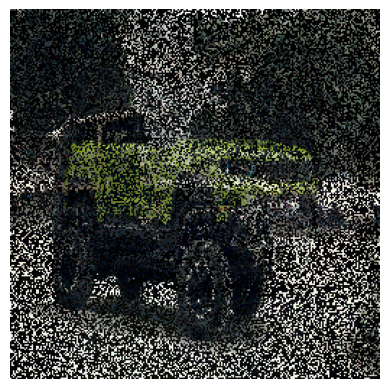

In [31]:
plt.imshow(generated)
plt.axis('off')
plt.show()

output_path = join(folder_path,"ai_style_generated.jpg")
Image.fromarray(generated).save(output_path)